In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [35]:
with open("output.csv", "r") as f:
    rows = f.readlines()
    rows = [row.rstrip() for row in rows[1:]]

time = []
function = []
nNodes = []
type = []

for row in rows:
    row = row.split()
    time.append(row[0])
    function.append(row[1])
    nNodes.append(row[2])
    type.append(row[3])

df = pd.DataFrame({
    "time": time,
    "function": function,
    "nNodes": nNodes,
    "type": type
})

df['time'] = df['time'].astype("int32")
df['nNodes'] = df['nNodes'].astype("int32")

df = df.groupby(["function", "type", "nNodes"]).mean()
df = df.reset_index()

In [43]:
df

,function,type,nNodes,time
0,find,list,10,27.8
1,find,list,100,35.4
2,find,list,500,30.2
3,find,list,1000,36.0
4,find,matrix,10,19.0
5,find,matrix,100,26.2
6,find,matrix,500,28.2
7,find,matrix,1000,27.4
8,find,table,10,34.0
9,find,table,100,36.4


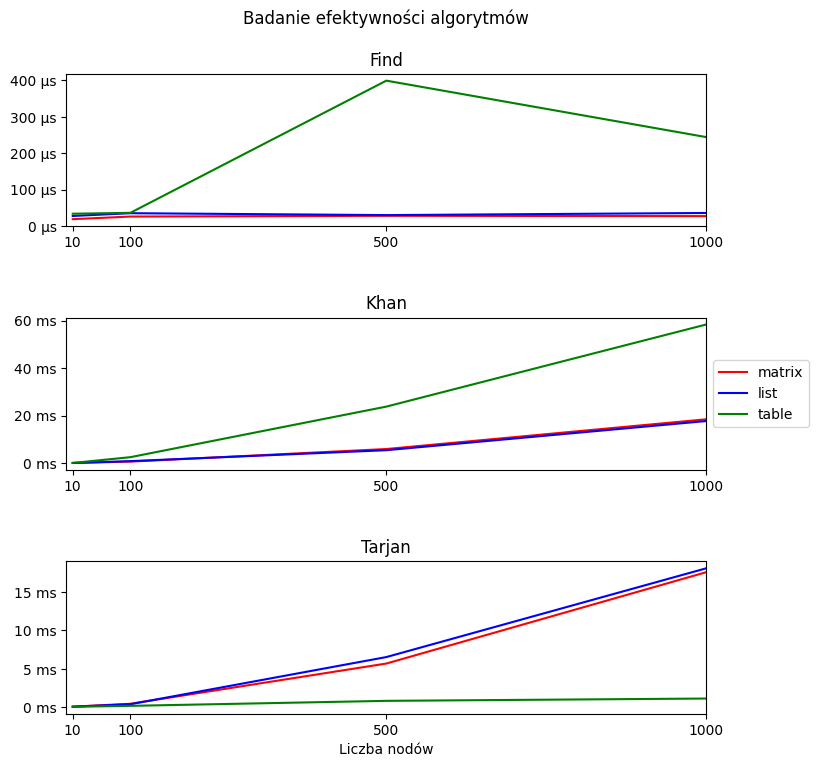

In [69]:
fig, ax = plt.subplots(nrows=3, figsize=(8, 8))
fig.suptitle("Badanie efektywności algorytmów")
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.6)

for i, function in enumerate(["find", "khan", "tarjan"]):
    for type, color in zip(["matrix", "list", "table"], ["red", "blue", "green"]):
        subset = df[(df['function'] == function) & (df['type'] == type)]
        subset.sort_values("nNodes", inplace=True)
        ax[i].plot(subset['nNodes'], subset['time'], color=color, label=type)
        ax[i].set_title(function[0].upper() + function[1:])

        ax[i].set_xticks([10, 100, 500, 1000])
        ax[i].set_xlim(0, 1000)

        if i == 2:
            ax[i].set_xlabel("Liczba nodów")

ax[0].set_yticks(np.arange(0, 401, 100), [f"{t} μs" for t in np.arange(0, 401, 100)])
ax[1].set_yticks(np.arange(0, 60001, 20000), [f"{t} ms" for t in np.arange(0, 61, 20)])
ax[2].set_yticks(np.arange(0, 15001, 5000), [f"{t} ms" for t in np.arange(0, 16, 5)])

plt.legend(bbox_to_anchor=(1, 2.1), loc="center left")
plt.savefig("graph.png", bbox_inches='tight')